In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler # To standardize the data
from sklearn.ensemble import IsolationForest # To find and eliminate the outliers.
import warnings
warnings.filterwarnings('ignore')

In [23]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


- SalePrice- 부동산의 판매 가격 (달러)입니다. 이것은 예측하려는 목표 변수입니다.
- MSSubClass : 건물 등급
- MSZoning : 일반 구역 분류
- LotFrontage : 부동산에 연결된 거리의 선형 피트
- LotArea : 평방 피트 단위의 부지 크기
- 거리 : 도로 접근 유형
- 골목 : 골목 접근 유형
- LotShape : 속성의 일반적인 모양
- LandContour : 부동산의 평탄도
- 유틸리티 : 사용 가능한 유틸리티 유형
- LotConfig : 로트 구성
- LandSlope : 부동산의 경사
- 지역 : 에임스시 경계 내의 물리적 위치
- 조건 1 : 주요 도로 또는 철도와의 근접성
- 조건 2 : 주요 도로 또는 철도와의 근접성 (초가있는 경우)
- BldgType : 주거 형태
- HouseStyle : 주거 스타일
- OverallQual : 전체 재료 및 마감 품질
- OverallCond : 전체 상태 등급
- 준공 연도 : 원래 공사 일
- YearRemodAdd : 리모델링 날짜
- RoofStyle : 지붕 유형
- RoofMatl : 지붕 재료
- Exterior1st : 주택 외장재
- 외장 2 차 : 주택 외장재 (하나 이상인 경우)
- MasVnrType : 조적 베니어 유형
- MasVnrArea : 벽돌 베니어 면적 (평방 피트)
- ExterQual : 외장재 품질
- ExterCond : 외장재의 현황
- 기초 : 기초 유형
- BsmtQual : 지하 높이
- BsmtCond : 지하실 개황
- BsmtExposure : 워크 아웃 또는 정원 수준의 지하 벽
- BsmtFinType1 : 지하 마감면의 품질
- BsmtFinSF1 : 유형 1 완성 된 평방 피트
- BsmtFinType2 : 두 번째 완성 된 영역의 품질 (있는 경우)
- BsmtFinSF2 : 유형 2 완성 된 평방 피트
- BsmtUnfSF : 미완성 된 지하실 면적
- TotalBsmtSF : 지하 총 평방 피트
- 난방 : 난방의 종류
- HeatingQC : 난방 품질 및 상태
- CentralAir : 중앙 에어컨
- 전기 : 전기 시스템
- 1stFlrSF : 1 층 평방 피트
- 2ndFlrSF : 2 층 평방 피트
- LowQualFinSF : 저품질 마감 평방 피트 (모든 층)
- GrLivArea : 지상 (지상) 거실 면적 평방 피트
- BsmtFullBath : 지하 전체 욕실
- BsmtHalfBath : 지하 반 욕실
- FullBath : 등급 이상의 전체 욕실
- HalfBath : 지상 절반의 목욕
- 침실 : 지하층 이상의 침실 수
- 주방 : 주방 수
- KitchenQual : 주방 품질
- TotRmsAbvGrd : 학년 이상의 총 방 (화장실 제외)
- 기능 : 홈 기능 등급
- 벽난로 : 벽난로 수
- FireplaceQu : 벽난로 품질
- GarageType : 차고 위치
- GarageYrBlt : 차고 건설 연도
- GarageFinish : 차고 내부 마감
- GarageCars : 차량 수용 가능 차고 크기
- GarageArea : 차고의 크기 (평방 피트)
- GarageQual : 차고 품질
- GarageCond : 차고 상태
- PavedDrive : 포장 된 진입로
- WoodDeckSF : 목재 데크 면적 (평방 피트)
- OpenPorchSF : 평방 피트 단위의 오픈 현관 영역
- EnclosedPorch : 닫힌 현관 영역 (평방 피트)
- 3SsnPorch : 평방 피트의 3 계절 현관 면적
- ScreenPorch : 스크린 현관 영역 (평방 피트)
- PoolArea : 수영장 면적 (평방 피트)
- PoolQC : 수영장 품질
- 울타리 : 울타리 품질
- MiscFeature : 다른 카테고리에서 다루지 않는 기타 기능
- MiscVal : 기타 기능의 $ Value
- MoSold : 월 판매
- YrSold : 판매 연도
- SaleType : 판매 유형
- SaleCondition : 판매 조건

In [24]:
train.isnull().sum().sort_values(ascending=False)
#확인해보니 오류가 아니라 없다를 none이 아니라 비어둔것임

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [25]:
df = train
cat_columns = df.select_dtypes(include=['object']).columns

for col in cat_columns:
    df[col] = df[col].fillna("None")

df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

num_columns = df.select_dtypes(exclude=['object']).columns
for col in num_columns:
    if col is not 'Electrical':
        df[col] = df[col].fillna(int(0))

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

df = df.drop(['Utilities'],axis=1)

In [26]:
df.isnull().sum().sort_values(ascending=False)

SalePrice        0
SaleCondition    0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
                ..
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
Id               0
Length: 80, dtype: int64

In [27]:
#이상치 제거하기!
num_attributes = df[num_columns]

high_quant = df.quantile(.999)

for col in num_columns:
    df = df.drop(df[col][df[col]>high_quant[col]].index)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1457
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1421 non-null   int64  
 1   MSSubClass     1421 non-null   int64  
 2   MSZoning       1421 non-null   object 
 3   LotFrontage    1421 non-null   float64
 4   LotArea        1421 non-null   int64  
 5   Street         1421 non-null   object 
 6   Alley          1421 non-null   object 
 7   LotShape       1421 non-null   object 
 8   LandContour    1421 non-null   object 
 9   LotConfig      1421 non-null   object 
 10  LandSlope      1421 non-null   object 
 11  Neighborhood   1421 non-null   object 
 12  Condition1     1421 non-null   object 
 13  Condition2     1421 non-null   object 
 14  BldgType       1421 non-null   object 
 15  HouseStyle     1421 non-null   object 
 16  OverallQual    1421 non-null   int64  
 17  OverallCond    1421 non-null   int64  
 18  YearBuil

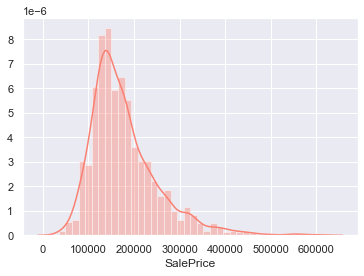

In [29]:
sns.distplot(df['SalePrice'], color= 'salmon')
#종속변수 분포 확인

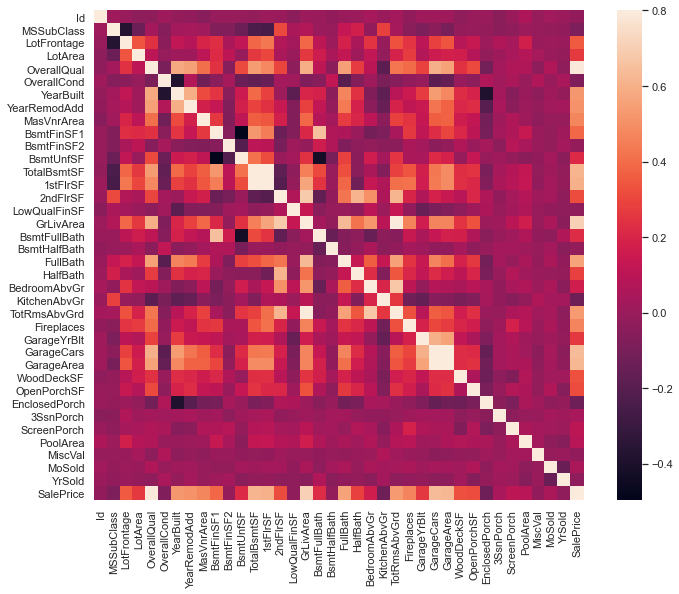

In [30]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
# 상관관계 히트맵을 그려보았다.

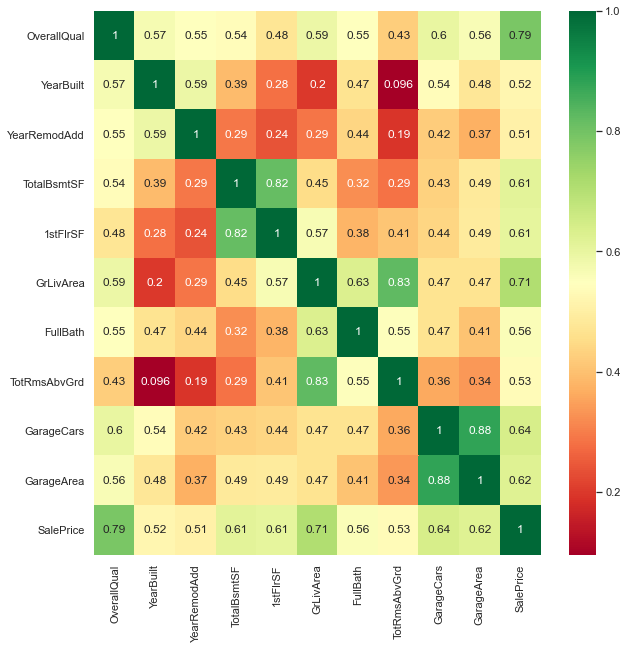

In [31]:
corr = train.corr()
highest_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[highest_corr_features].corr(),annot=True,cmap="RdYlGn")
#상관관계 중에서 절댓값이 0.5보다 큰것만 골라서 그렸당~

In [32]:
corr["SalePrice"].sort_values(ascending=False)
#그림에서도 알수 있듯이 OverallQual(OverallQual : 전체 재료 및 마감 품질)이 집값과 가장 높은 상관관계를 가진다.

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.349876
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### Feature Engineering

In [ ]:
#아직....못한..../(ㄒoㄒ)/~~
#어떤변수를 추가할지 감이 안와서 일단은 넘겨야징!!

### Making Dataset

In [33]:
df= pd.get_dummies(df)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


### Modeling

In [ ]:
#이번엔 머신러닝도 돌리고 아마 딥러닝도 하나 돌려볼 생각입니다.